# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Michelle Casey
- **Email:** michellecasey1311@gmail.com
- **ID Dicoding:** michelle_casey_wkV6

## Menentukan Pertanyaan Bisnis

- Pada musim apa paling banyak dilakukan bike rental?
- Pada bulan apa paling banyak dilakukan bike rental?
- Bagaimana perbandingan jumlah bike rental pada beberapa jenis cuaca yang berbeda?
- Bagaimana perbandingan jumlah penyewa antara casual users dengan registered users?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Pertama-tama, diambil dataset bike-rental dari repository github dan kemudian diubah dari format csv ke bentuk dataframe.

In [2]:
bike_df = pd.read_csv("https://raw.githubusercontent.com/michellecaseyy/submission/main/day.csv")
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data

Pada tahap ini, dilakukan penilaian terhadap kualitas data. Dari proses ini dapat diketahui bahwa tidak terdapat adanya missing values dan juga tidak terdapat duplikasi data. Namun, terdapat kesalahan tipe data yaitu kolom "dteday" seharusnya memiliki tipe data datetime.

In [3]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [6]:
bike_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
print("Jumlah duplikasi: ", bike_df.duplicated().sum())

Jumlah duplikasi:  0


In [8]:
bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### Cleaning Data

Pada tahap ini, dilakukan pembersihan data berdasarkan hasil penilaian dari tahapan sebelumnya. Kolom "dteday" akan diubah tipe datanya sehingga yang semula object berubah menjadi datetime. Lalu, juga dilakukan perubahan nama (rename) pada kolom "mnth "dan "cnt" agar menjadi "month" dan "user_count" untuk mempermudah memahami data.

In [9]:
bike_df["dteday"] = pd.to_datetime(bike_df["dteday"])
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [66]:
bike_df.rename(columns={
    "cnt": "user_count",
    "mnth": "month"
}, inplace=True)
bike_df.head()

,instant,dteday,season,yr,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,user_count
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


## Exploratory Data Analysis (EDA)

Pada tahap ini, dilakukan eksplorasi data untuk mendapatkan informasi yang dibutuhkan untuk menjawab pertanyaan-pertanyaan bisnis di awal. Pada tahap ini akan dibuat pivot table yang memberikan informasi jumlah penyewa sepeda berdasarkan musim, bulan, dan cuaca. Selain itu, juga dieksplorasi terkait jumlah penyewa berdasarkan tipenya, yaitu registered users dan casual users.

### Explore Data bike_df

In [67]:
bike_df.groupby(by="season").user_count.sum().sort_values(ascending=False)

season
3    1061129
2     918589
4     841613
1     471348
Name: user_count, dtype: int64

In [68]:
bike_df.groupby(by="month").user_count.sum().sort_values(ascending=False)

month
8     351194
6     346342
9     345991
7     344948
5     331686
10    322352
4     269094
11    254831
3     228920
12    211036
2     151352
1     134933
Name: user_count, dtype: int64

In [69]:
bike_df.groupby(by="weathersit").user_count.sum().sort_values(ascending=False)

weathersit
1    2257952
2     996858
3      37869
Name: user_count, dtype: int64

In [70]:
print("Jumlah registered users: ",bike_df['registered'].sum())

Jumlah registered users:  2672662


In [71]:
print("Jumlah casual users: ",bike_df["casual"].sum())

Jumlah casual users:  620017


In [72]:
print("Jumlah total users: ",bike_df["user_count"].sum())

Jumlah total users:  3292679


## Visualization & Explanatory Analysis

Pada tahap ini, seluruh informasi yang telah didapatkan pada tahap eksplorasi akan diubah ke dalam bentuk visual. Digunakan bar plot serta pie chart untuk menyajikan informasi terkait data persewaan sepeda.

### Pertanyaan 1: Pada musim apa paling banyak dilakukan bike rental?

In [73]:
by_season_df = bike_df.groupby(by="season").user_count.sum().sort_values(ascending=False).reset_index()
by_season_df["season"] = by_season_df["season"].astype(str)
season_map = {"1": "Spring", "2": "Summer", "3": "Fall", "4": "Winter"}
by_season_df["season"] = by_season_df["season"].map(season_map)
by_season_df.head()

,season,user_count
0,Fall,1061129
1,Summer,918589
2,Winter,841613
3,Spring,471348


<ipython-input-88-51685a84deb2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="season", y="user_count", data=by_season_df, palette=colors_)


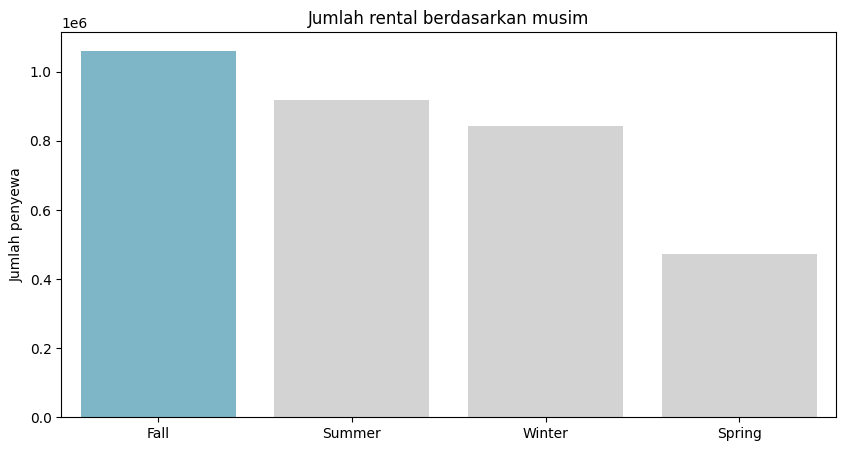

In [88]:
plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(x="season", y="user_count", data=by_season_df, palette=colors_)
plt.title("Jumlah rental berdasarkan musim")
plt.xlabel(None)
plt.ylabel("Jumlah penyewa")
plt.show()

### Pertanyaan 2: Pada bulan apa paling banyak dilakukan bike rental?

In [79]:
by_month_df = bike_df.groupby(by="month").user_count.sum().reset_index()
by_month_df["month"] = by_month_df["month"].astype(str)
month_map = {"1": "Jan", "2": "Feb", "3": "Mar", "4": "Apr","5": "May", "6": "Jun", "7": "Jul", "8": "Aug","9": "Sep", "10": "Oct", "11": "Nov", "12": "Dec"}
by_month_df["month"] = by_month_df["month"].map(month_map)
by_month_df.head(15)

,month,user_count
0,Jan,134933
1,Feb,151352
2,Mar,228920
3,Apr,269094
4,May,331686
5,Jun,346342
6,Jul,344948
7,Aug,351194
8,Sep,345991
9,Oct,322352


<ipython-input-89-61507cec86ff>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="month", y="user_count", data=by_month_df, palette=colors_)


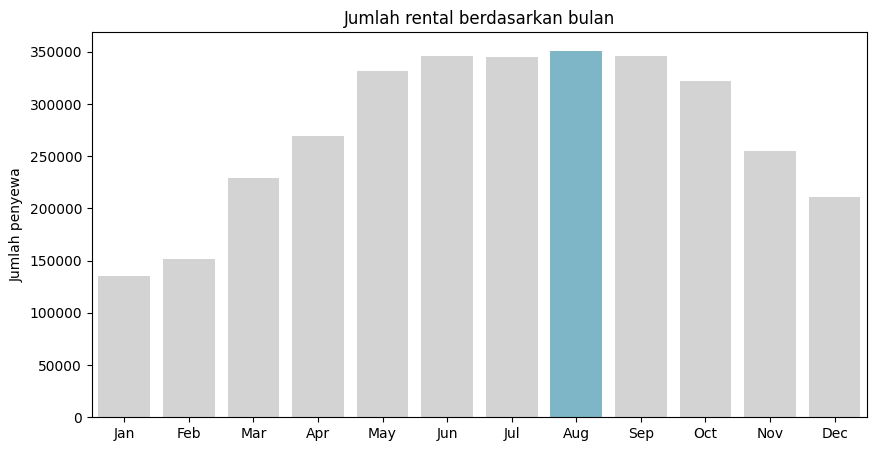

In [89]:
plt.figure(figsize=(10, 5))
colors_ = ["#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3","#D3D3D3", "#D3D3D3", "#D3D3D3","#72BCD4", "#D3D3D3", "#D3D3D3","#D3D3D3", "#D3D3D3"]
sns.barplot(x="month", y="user_count", data=by_month_df, palette=colors_)
plt.title("Jumlah rental berdasarkan bulan")
plt.xlabel(None)
plt.ylabel("Jumlah penyewa")
plt.show()

### Pertanyaan 3: Bagaimana perbandingan jumlah bike rental pada beberapa jenis cuaca yang berbeda?

In [82]:
by_weather_df = bike_df.groupby(by="weathersit").user_count.sum().sort_values(ascending=False).reset_index()
by_weather_df.head()

,weathersit,user_count
0,1,2257952
1,2,996858
2,3,37869


<ipython-input-90-d8f17daec5fc>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="weathersit", y="user_count", data=by_weather_df, palette=colors_)
<ipython-input-90-d8f17daec5fc>:3: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.barplot(x="weathersit", y="user_count", data=by_weather_df, palette=colors_)


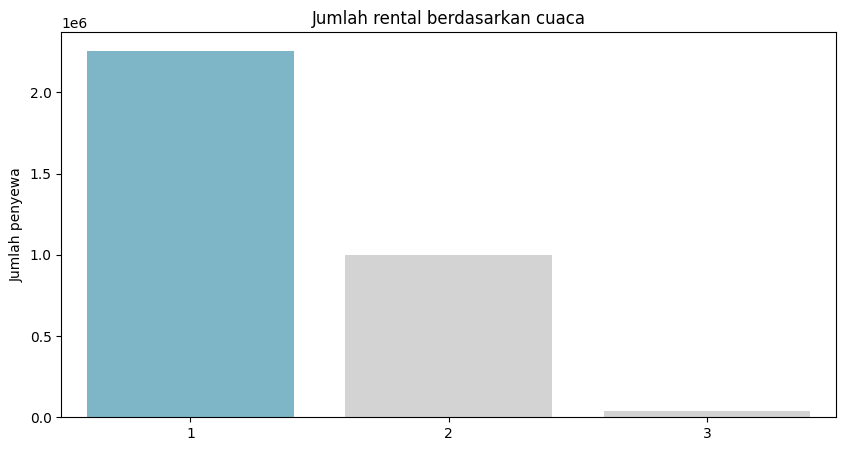

In [90]:
plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(x="weathersit", y="user_count", data=by_weather_df, palette=colors_)
plt.title("Jumlah rental berdasarkan cuaca")
plt.xlabel(None)
plt.ylabel("Jumlah penyewa")
plt.show()

### Pertanyaan 4: Bagaimana perbandingan jumlah penyewa antara casual users dengan registered users?

In [86]:
cat = ('Registered Users', 'Casual Users')
count = (bike_df['registered'].sum(),bike_df['casual'].sum())
colors = ("#E1AFD1","#FFE6E6")
explode = (0.1, 0)

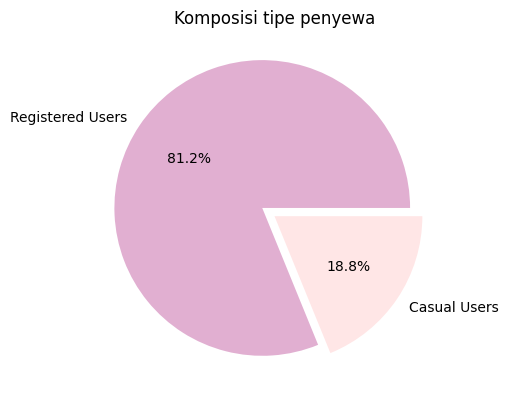

In [91]:
plt.pie(
    x=count,
    labels=cat,
    autopct='%1.1f%%',
    colors=colors,
    explode=explode
)
plt.title("Komposisi tipe penyewa")
plt.show()

## Conclusion

Dari seluruh tahapan analisis data yang telah dilakukan, dapat diperoleh kesimpulan dari masing-masing pertanyaan, yaitu sebagai berikut :

- Kesimpulan pertanyaan 1 : Jumlah sewa sepeda paling banyak ditemui pada musim gugur.
- Kesimpulan pertanyaan 2 : Jumlah sewa sepeda paling banyak ditemui pada Bulan Agustus.
- Kesimpulan pertanyaan 3 : Jumlah sewa sepeda paling banyak ditemui pada cuaca cerah dan sedikit berawan
- Kesimpulan pertanyaan 4 : Komposisi dari keseluruhan penyewa sepeda adalah 81.2% dari registered users dan 18.8% dari casual users.